In [1]:
# Set up
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)
options(repr.matrix.max.rows = 6)

set.seed(1234)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

In [2]:
# Reading in data
url <- "https://raw.githubusercontent.com/karlie-tr/STAT201-GroupProject/main/glassdoor_salaries.csv"
untidy_salary_data <- read_csv(url)

head(untidy_salary_data)

Rows: 1000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): JobTitle, Gender, Education, Dept
dbl (5): Age, PerfEval, Seniority, BasePay, Bonus

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Graphic Designer,Female,18,5,College,Operations,2,42363,9938
Software Engineer,Male,21,5,College,Management,5,108476,11128
Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
IT,Female,20,5,PhD,Operations,4,70890,10126


In [3]:
# Tidy dataset, combine BasePay and Bonus into Annual_Salary
salary_data <- untidy_salary_data %>%
                    mutate(Annual_Salary = BasePay + Bonus) %>%
                    select(Gender, Annual_Salary) %>%
                    na.omit()

head(salary_data)

Gender,Annual_Salary
<chr>,<dbl>
Female,52301
Male,119604
Female,99476
Male,118234
Male,108783
Female,81016


In [4]:
# plot histograms of annual salary based on gender
female_salary_plot <- salary_data %>%
                                filter(Gender == "Female") %>%
                                ggplot() +
                                geom_histogram(aes(x = Annual_Salary), bins = 10) +
                                scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                                labs(x = "Annual Salary") +
                                ggtitle("Annual Salary of Female Employees")

male_salary_plot <- salary_data %>%
                                filter(Gender == "Male") %>%
                                ggplot() +
                                geom_histogram(aes(x = Annual_Salary), bins = 10) +
                                scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                                labs(x = "Annual Salary") +
                                ggtitle("Annual Salary of Male Employees")

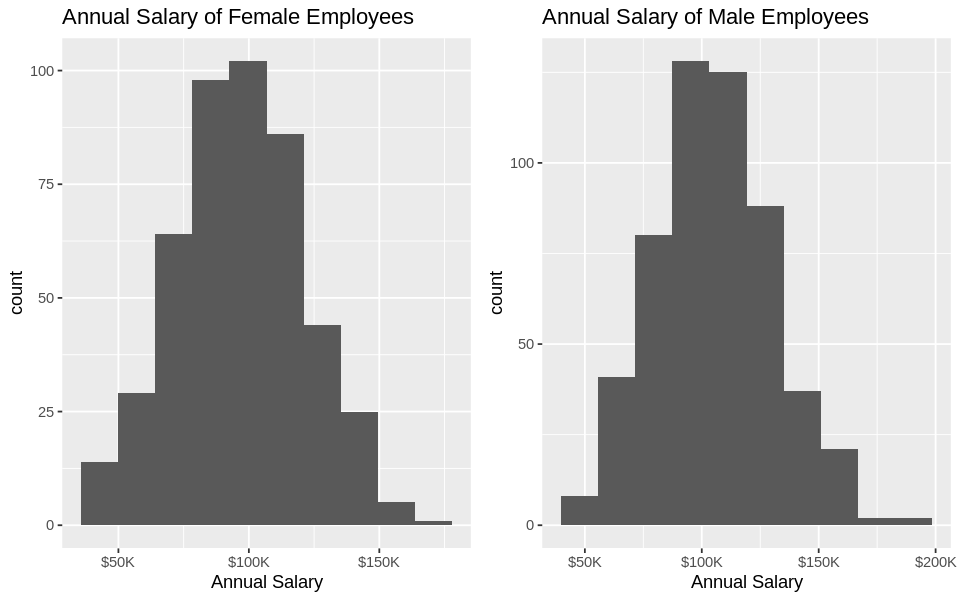

In [5]:
# plot 2 graph side-by-side for comparison
options(repr.plot.width = 8, repr.plot.height = 5)

grid.arrange(female_salary_plot, male_salary_plot, ncol = 2)  

In [6]:
# Boxplot
salary_plot <- salary_data %>%
                    ggplot() +
                    geom_boxplot(aes(x = Annual_Salary, y = Gender, fill = Gender)) +
                    labs(x = "Annual Salary") +
                    scale_fill_brewer(palette = "Dark2") +
                    scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                    theme(legend.position = "none") +
                    coord_flip() 

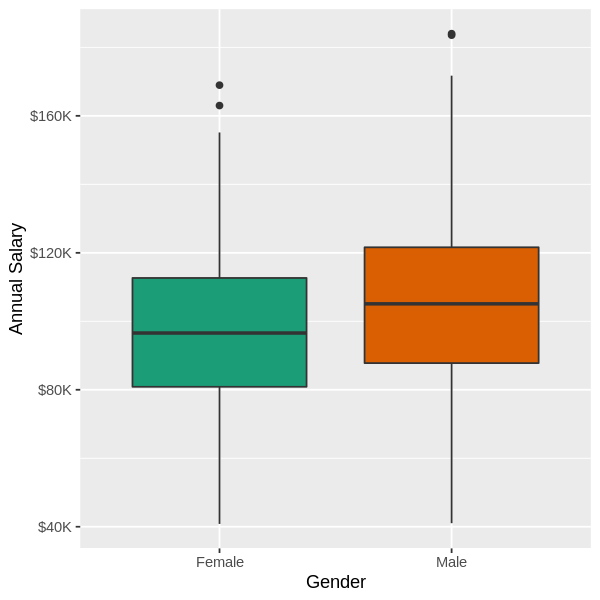

In [7]:
options(repr.plot.width = 5, repr.plot.height = 5)
salary_plot